**Codificación de variables categóricas**

In [1]:
import pandas as pd

# Datos de la tabla
data = {
    'Edad': [25, 35, 45, 23, 50, 30],
    'Salario': [50000, 60000, 80000, 40000, 90000, 70000],
    'Estado Civil': ['Soltero', 'Casado', 'Casado', 'Soltero', 'Casado', 'Soltero'],
    'Casa Propia': ['No', 'Sí', 'Sí', 'No', 'Sí', 'Sí'],
    'Tomó Préstamo': ['Sí', 'Sí', 'Sí', 'No', 'Sí', 'No']
}

# Crear el DataFrame
df = pd.DataFrame(data)
df

,Edad,Salario,Estado Civil,Casa Propia,Tomó Préstamo
0,25,50000,Soltero,No,Sí
1,35,60000,Casado,Sí,Sí
2,45,80000,Casado,Sí,Sí
3,23,40000,Soltero,No,No
4,50,90000,Casado,Sí,Sí
5,30,70000,Soltero,Sí,No


In [2]:
# codificación one hot
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df[['Estado Civil', 'Casa Propia', 'Tomó Préstamo']])

# Crear un DataFrame con los datos codificados
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['Estado Civil', 'Casa Propia', 'Tomó Préstamo']))

# Combinar el DataFrame original con el DataFrame codificado
df_final = pd.concat([df[['Edad', 'Salario']], encoded_df], axis=1)

# Mostrar el DataFrame final
print(df_final)

   Edad  Salario  Estado Civil_Casado  Estado Civil_Soltero  Casa Propia_No  \
0    25    50000                  0.0                   1.0             1.0   
1    35    60000                  1.0                   0.0             0.0   
2    45    80000                  1.0                   0.0             0.0   
3    23    40000                  0.0                   1.0             1.0   
4    50    90000                  1.0                   0.0             0.0   
5    30    70000                  0.0                   1.0             0.0   

   Casa Propia_Sí  Tomó Préstamo_No  Tomó Préstamo_Sí  
0             0.0               0.0               1.0  
1             1.0               0.0               1.0  
2             1.0               0.0               1.0  
3             0.0               1.0               0.0  
4             1.0               0.0               1.0  
5             1.0               1.0               0.0  


In [3]:
# codificación ordinal
from sklearn.preprocessing import OrdinalEncoder

df2 = df.copy()
df2 = df2.drop(['Edad','Salario'],axis=1)

enc = OrdinalEncoder()
enc.fit(df2)

OrdinalEncoder()

In [4]:
enc.categories_

[array(['Casado', 'Soltero'], dtype=object),
 array(['No', 'Sí'], dtype=object),
 array(['No', 'Sí'], dtype=object)]

In [5]:
# codificando
enc.transform(df2)

array([[1., 0., 1.],
       [0., 1., 1.],
       [0., 1., 1.],
       [1., 0., 0.],
       [0., 1., 1.],
       [1., 1., 0.]])

In [6]:
# Datos de la tabla
datanew = {
      'Edad': [25, 35, 45, 23, 50, 30],
      'Salario': [50000, 60000, 80000, 40000, 90000, 70000],
      'Estado Civil': enc.transform(df2)[:,0],
      'Casa Propia': enc.transform(df2)[:,1],
      'Tomó Préstamo': enc.transform(df2)[:,2]
       }

# Crear el DataFrame
df_new = pd.DataFrame(datanew)
df_new

,Edad,Salario,Estado Civil,Casa Propia,Tomó Préstamo
0,25,50000,1.0,0.0,1.0
1,35,60000,0.0,1.0,1.0
2,45,80000,0.0,1.0,1.0
3,23,40000,1.0,0.0,0.0
4,50,90000,0.0,1.0,1.0
5,30,70000,1.0,1.0,0.0


In [7]:
# codificación de enteros
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['Estado Civil'] = label_encoder.fit_transform(df['Estado Civil'])
df['Casa Propia'] = label_encoder.fit_transform(df['Casa Propia'])
df['Tomó Préstamo'] = label_encoder.fit_transform(df['Tomó Préstamo'])


In [8]:
df

,Edad,Salario,Estado Civil,Casa Propia,Tomó Préstamo
0,25,50000,1,0,1
1,35,60000,0,1,1
2,45,80000,0,1,1
3,23,40000,1,0,0
4,50,90000,0,1,1
5,30,70000,1,1,0


**Entropía:**

In [9]:
# Entropia Estado Civil:

import numpy as np
from scipy.stats import entropy

pk_EC = np.array([4/6, 2/6])
Entropy_EC  = entropy(pk_EC, base=2)

print(Entropy_EC)

0.9182958340544894


**Decision Tree**

In [10]:
from sklearn.datasets import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import graphviz.backend as be
from IPython.display import Image, display_svg, SVG
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import numpy as np

In [11]:
df.values

array([[   25, 50000,     1,     0,     1],
       [   35, 60000,     0,     1,     1],
       [   45, 80000,     0,     1,     1],
       [   23, 40000,     1,     0,     0],
       [   50, 90000,     0,     1,     1],
       [   30, 70000,     1,     1,     0]])

In [12]:
X_train = df.values[:,:4]
y_train = df.values[:,4]

decisiontree = DecisionTreeClassifier(criterion='entropy' ) #entropy
decisiontree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.6, 0.875, 'x[0] <= 32.5\nentropy = 0.918\nsamples = 6\nvalue = [2, 4]'),
 Text(0.4, 0.625, 'x[1] <= 45000.0\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(0.2, 0.375, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.375, 'x[0] <= 27.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.625, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]')]

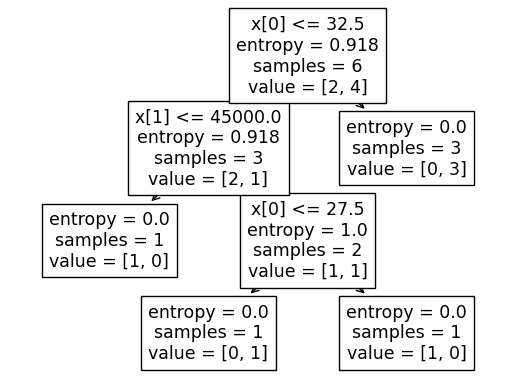

In [13]:
plot_tree(decisiontree)

In [14]:
# score: accuracy
decisiontree.score(X_train,y_train)

1.0

In [15]:
df_new = df.drop(['Tomó Préstamo'],axis=1)
df_new

,Edad,Salario,Estado Civil,Casa Propia
0,25,50000,1,0
1,35,60000,0,1
2,45,80000,0,1
3,23,40000,1,0
4,50,90000,0,1
5,30,70000,1,1


<BarContainer object of 4 artists>

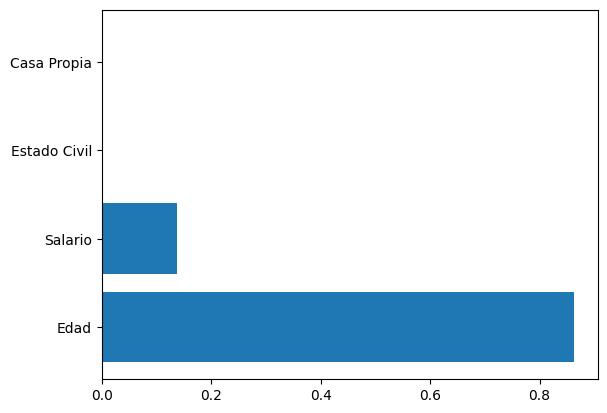

In [16]:
decisiontree.feature_importances_
plt.barh(df_new.columns,decisiontree.feature_importances_)

**Dataset Iris**

In [17]:
from sklearn.model_selection import train_test_split

iris = load_iris()

X_train = iris.data
y_train = iris.target

In [18]:
x_train,x_test,y_train,y_test = train_test_split(X_train,y_train)
print(x_train.shape)
print(x_test.shape)

(112, 4)
(38, 4)


In [19]:
decisiontree = DecisionTreeClassifier(criterion='entropy' ) #entropy
decisiontree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [20]:
y_train_pred = decisiontree.predict(x_train)
y_train_pred

array([1, 1, 1, 2, 2, 0, 1, 0, 2, 1, 0, 0, 0, 0, 2, 1, 2, 1, 0, 1, 2, 2,
       0, 1, 2, 2, 2, 2, 1, 2, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 1, 1, 2, 0,
       0, 2, 0, 2, 0, 1, 0, 2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 2,
       0, 0, 2, 1, 2, 0, 0, 0, 2, 2, 0, 1, 0, 0, 1, 2, 1, 0, 0, 2, 1, 2,
       2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 0, 2, 1, 2, 1, 2, 0, 1, 1, 1, 0, 0,
       1, 0])

In [21]:
y_test_pred = decisiontree.predict(x_test)
y_test_pred

array([0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 2, 2, 2, 2, 0, 1, 2,
       1, 0, 1, 2, 0, 1, 1, 1, 1, 0, 1, 2, 2, 2, 0, 2])

[Text(0.3333333333333333, 0.9285714285714286, 'x[3] <= 0.8\nentropy = 1.585\nsamples = 112\nvalue = [37, 38, 37]'),
 Text(0.2222222222222222, 0.7857142857142857, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.4444444444444444, 0.7857142857142857, 'x[3] <= 1.65\nentropy = 1.0\nsamples = 75\nvalue = [0, 38, 37]'),
 Text(0.2222222222222222, 0.6428571428571429, 'x[2] <= 5.0\nentropy = 0.179\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.1111111111111111, 0.5, 'entropy = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.3333333333333333, 0.5, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6666666666666666, 0.6428571428571429, 'x[2] <= 5.05\nentropy = 0.297\nsamples = 38\nvalue = [0, 2, 36]'),
 Text(0.5555555555555556, 0.5, 'x[1] <= 2.9\nentropy = 0.811\nsamples = 8\nvalue = [0, 2, 6]'),
 Text(0.4444444444444444, 0.35714285714285715, 'entropy = 0.0\nsamples = 4\nvalue = [0, 0, 4]'),
 Text(0.6666666666666666, 0.35714285714285715, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 4\

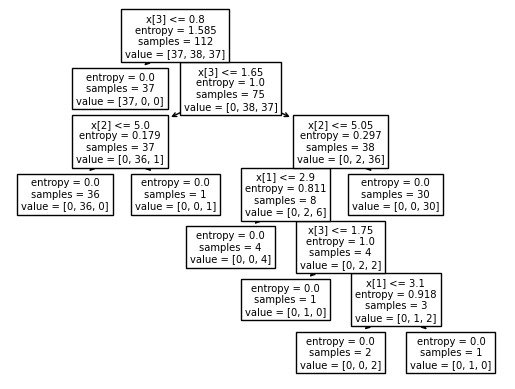

In [22]:
plot_tree(decisiontree)

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusionmatrix(y_pred,y_train):
    print('Confusion matrix')
    cf = confusion_matrix(y_pred,y_train)
    sns.heatmap(cf,annot=True,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

In [24]:
y_test

array([0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 1, 2, 1, 1, 0, 2, 2, 2, 2, 0, 1, 2,
       1, 0, 1, 2, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 2])

In [25]:
y_test_pred

array([0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 2, 2, 2, 2, 0, 1, 2,
       1, 0, 1, 2, 0, 1, 1, 1, 1, 0, 1, 2, 2, 2, 0, 2])

Train score 1.0
Test score 0.9473684210526315
Confusion matrix


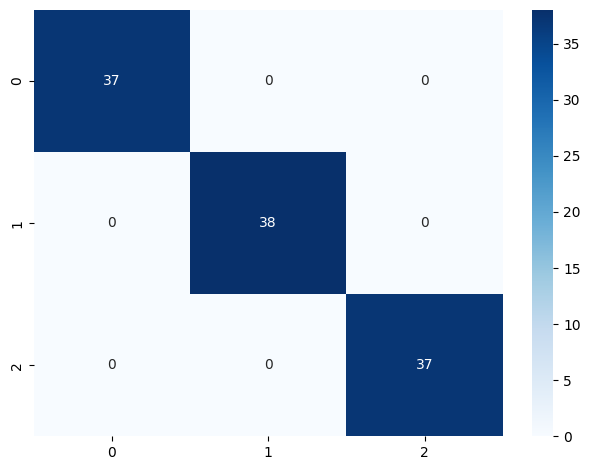

Confusion matrix


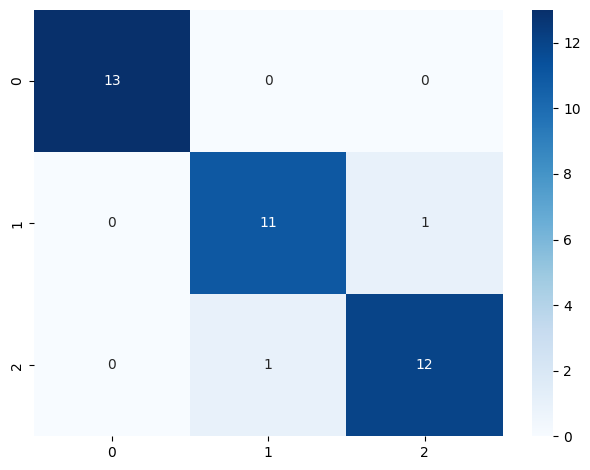

In [26]:
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train)
plot_confusionmatrix(y_test_pred,y_test)

In [27]:
# Pre pruning techniques
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

gcv = GridSearchCV(estimator=decisiontree,param_grid=params)
gcv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [29]:
model = gcv.best_estimator_
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

from sklearn.metrics import confusion_matrix
#print(confusion_matrix(y_train,y_train_pred))

[[37  0  0]
 [ 0 38  0]
 [ 0  0 37]]


Train score 1.0
Test score 0.9473684210526315
[[13  0  0]
 [ 0 11  1]
 [ 0  1 12]]
Confusion matrix


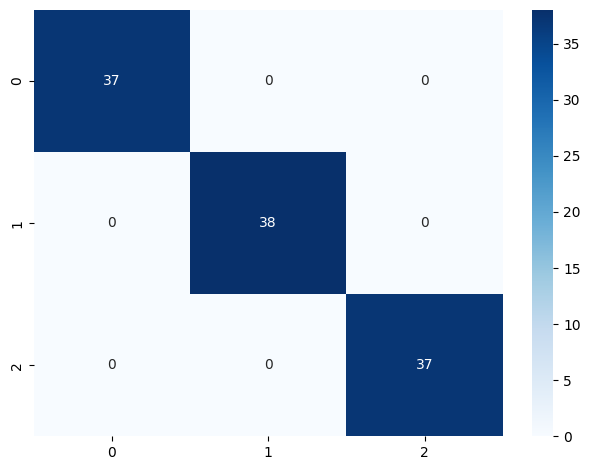

Confusion matrix


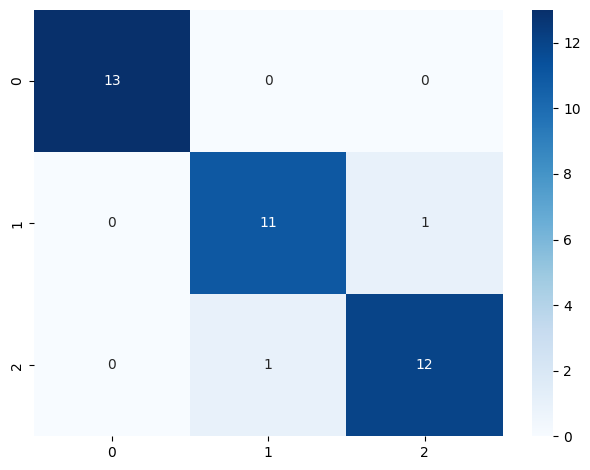

In [37]:
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

print(confusion_matrix(y_test,y_test_pred))
plot_confusionmatrix(y_train_pred,y_train)
plot_confusionmatrix(y_test_pred,y_test)

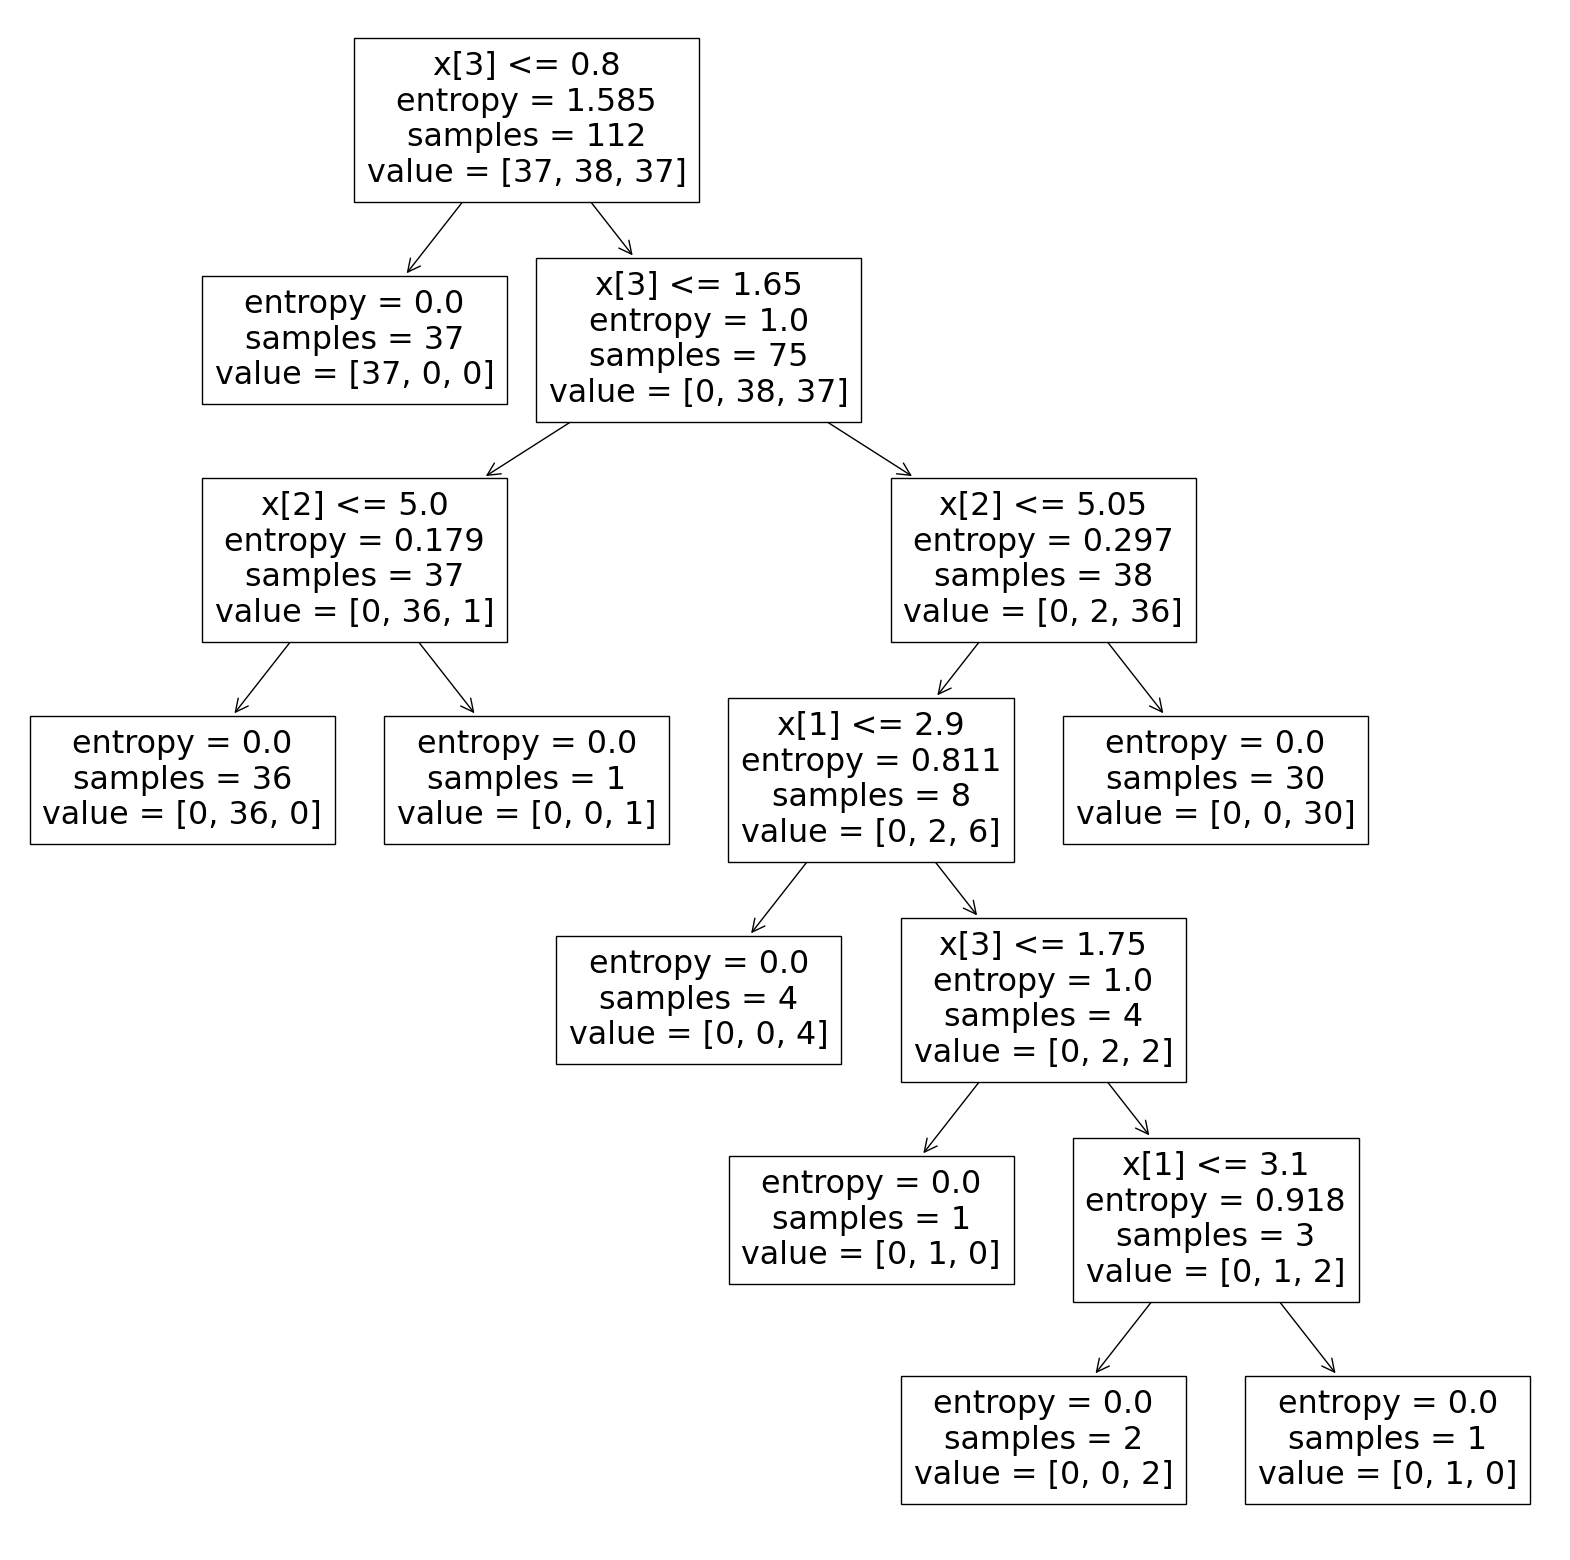

In [31]:
plt.figure(figsize=(20,20))
classes = ['0','1','2']
plot_tree(model)
plt.show()

In [32]:
# post prunning
path = decisiontree.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.01785714 0.02223415 0.04297965 0.05921852 0.50941037
 0.91529085]


In [33]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

In [34]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

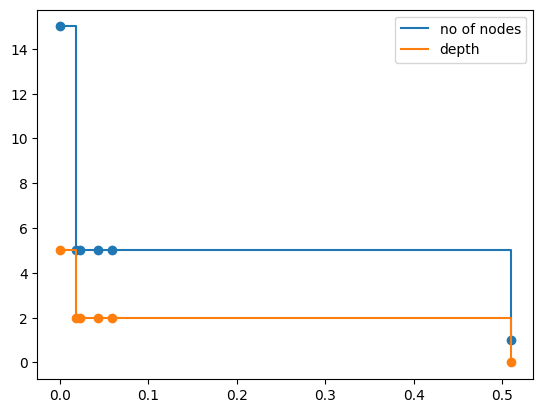

In [35]:
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

Text(0, 0.5, 'total impurity of leaves')

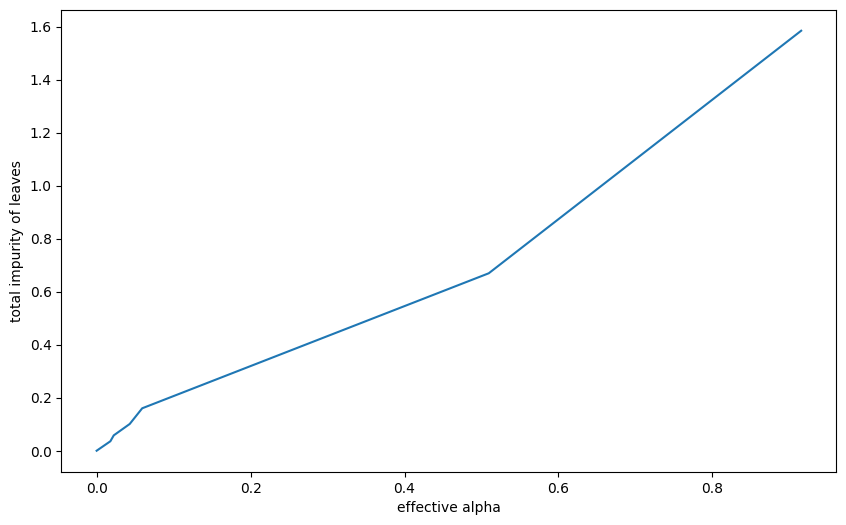

In [36]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")